### Setup

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sci

### Ex 1) (Rencher 12.8)

Carry out a principal component analysis on all six variables of the glucose
data of Table 3.8. Use both S and R. Which do you think is more appropriate here? Show the percent of variance explained. Based on the average eigenvalue or a scree plot, decide how many components to retain. Can you interpret the components of either S or R?

In [8]:
cols = [f"y{i+1}" for i in range(6)]
df = pd.read_table("data/T3_8_GLUCOSE.DAT", header=None, sep="\s+", names=cols)
df

,y1,y2,y3,y4,y5,y6
0,60,69,62,97,69,98
1,56,53,84,103,78,107
2,80,69,76,66,99,130
3,55,80,90,80,85,114
4,62,75,68,116,130,91
5,74,64,70,109,101,103
6,64,71,66,77,102,130
7,73,70,64,115,110,109
8,68,67,75,76,85,119
9,69,82,74,72,133,127


In [18]:
S = df.cov().to_numpy()
print(S)

[[ 95.5444898   17.60897959  12.1755102   60.51591837  23.00081633
   62.83836735]
 [ 17.60897959  73.1922449   14.25102041   5.72734694  61.27591837
   -1.66244898]
 [ 12.1755102   14.25102041  76.17346939  46.74693878  32.77142857
   69.83877551]
 [ 60.51591837   5.72734694  46.74693878 808.63020408 320.58857143
  227.36081633]
 [ 23.00081633  61.27591837  32.77142857 320.58857143 505.85959184
  167.35183673]
 [ 62.83836735  -1.66244898  69.83877551 227.36081633 167.35183673
  508.71387755]]


In [21]:
np.diag(S)

array([ 95.5444898 ,  73.1922449 ,  76.17346939, 808.63020408,
       505.85959184, 508.71387755])

We can see that variances differ a lot, which means that it is justifiable to use PCA with matrix $R$ instead of $S$. We will do both:

In [37]:
def eigsorted(A):
    vals, vecs = np.linalg.eigh(A)
    order = vals.argsort()[::-1]
    return vals[order], vecs[:,order]

In [38]:
eigen_val, eigen_vect = eigsorted(S)

In [39]:
disp_retained = [np.sum(eigen_val[:i+1])/np.sum(eigen_val) for i in range(eigen_val.shape[0])]

In [40]:
disp_retained

[0.5570192594590959,
 0.747590175771829,
 0.89786519516983,
 0.945139003814336,
 0.9784234174973956,
 1.0]

If we want to choose $\lambda_i \geq \bar{\lambda}$:

In [55]:
mask = (eigen_val >= eigen_val.mean())
print(eigen_val[mask])
print(eigen_vect[mask])
print(f"retained varience = {np.sum(eigen_val[mask])/np.sum(eigen_val)}")

[1151.97926055  394.12235668]
[[-0.08007824 -0.09212769  0.06885666  0.805104    0.46093441 -0.34598517]
 [-0.03368073  0.01754852 -0.2016778   0.51825669 -0.29488846  0.77610213]]
retained varience = 0.747590175771829


Scree plot:

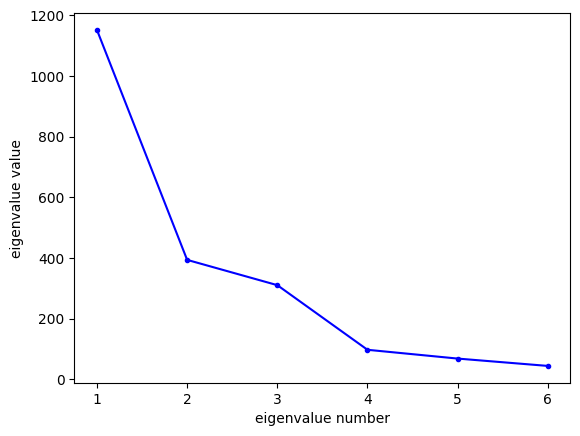

In [52]:
fig, ax = plt.subplots()

ax.plot(np.arange(1, eigen_val.shape[0] + 1, 1), eigen_val, color ='blue', marker=".")

plt.xlabel("eigenvalue number")
plt.ylabel("eigenvalue value")

plt.show()

Based on the plot we should select first 3 eigenvectors:

In [56]:
print(eigen_val[:3])
print(eigen_vect[:3])
print(f"retained varience = {np.sum(eigen_val[:3])/np.sum(eigen_val)}")

[1151.97926055  394.12235668  310.78585307]
[[-0.08007824 -0.09212769  0.06885666  0.805104    0.46093441 -0.34598517]
 [-0.03368073  0.01754852 -0.2016778   0.51825669 -0.29488846  0.77610213]
 [-0.07603295 -0.12171053  0.01077758  0.24733551 -0.8302299  -0.47836476]]
retained varience = 0.89786519516983


Now we will do the same with correlation matrix $R$:

In [57]:
R = df.corr().to_numpy()
print(R)

[[ 1.          0.21057113  0.14271922  0.21771674  0.10462258  0.28502652]
 [ 0.21057113  1.          0.19085852  0.02354214  0.31845077 -0.00861547]
 [ 0.14271922  0.19085852  1.          0.18835464  0.16694696  0.35477904]
 [ 0.21771674  0.02354214  0.18835464  1.          0.50125424  0.35448989]
 [ 0.10462258  0.31845077  0.16694696  0.50125424  1.          0.32989725]
 [ 0.28502652 -0.00861547  0.35477904  0.35448989  0.32989725  1.        ]]


In [58]:
eigen_val, eigen_vect = eigsorted(R)

In [59]:
disp_retained = [np.sum(eigen_val[:i+1])/np.sum(eigen_val) for i in range(eigen_val.shape[0])]
disp_retained

[0.3628001507552537,
 0.5427516344844348,
 0.7057185910709218,
 0.8500053573507097,
 0.9419531191021022,
 1.0]

If we want to choose $\lambda_i \geq \bar{\lambda}$:

In [61]:
mask = (eigen_val >= eigen_val.mean())
print(eigen_val[mask])
print(eigen_vect[mask])
print(f"retained varience = {np.sum(eigen_val[mask])/np.sum(eigen_val)}")

[2.1768009 1.0797089]
[[ 0.33610232 -0.17632066  0.49650553  0.71320481  0.14079025  0.28450928]
 [ 0.25777695 -0.84305715 -0.09320965 -0.06547271 -0.11455634 -0.44351755]]
retained varience = 0.5427516344844348


Scree plot:

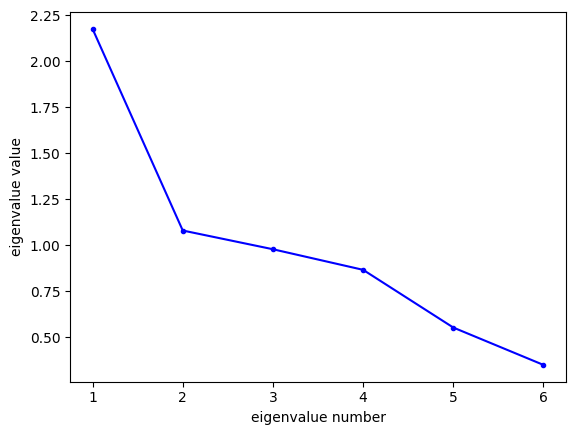

In [62]:
fig, ax = plt.subplots()

ax.plot(np.arange(1, eigen_val.shape[0] + 1, 1), eigen_val, color ='blue', marker=".")

plt.xlabel("eigenvalue number")
plt.ylabel("eigenvalue value")

plt.show()

Based on the plot we should select first 4 eigenvectors:

In [66]:
print(eigen_val[:4])
print(eigen_vect[:4])
print(f"retained varience = {np.sum(eigen_val[:4])/np.sum(eigen_val)}")

[2.1768009  1.0797089  0.97780174 0.8657206 ]
[[ 0.33610232 -0.17632066  0.49650553  0.71320481  0.14079025  0.28450928]
 [ 0.25777695 -0.84305715 -0.09320965 -0.06547271 -0.11455634 -0.44351755]
 [ 0.36952081 -0.04919564  0.46644095 -0.67089139  0.38667196  0.20941953]
 [ 0.47541921  0.32867121 -0.35768216  0.172688    0.55850979 -0.44301349]]
retained varience = 0.8500053573507097


### Ex 2) (Rencher 12.10)

Carry out a principal component analysis separately for males and females in
the psychological data of Table 5.1. Compare the results for the two groups.
Use S.

In [68]:
cols = ["type"] + [f"y{i+1}" for i in range(4)]
df = pd.read_table("data/T5_1_PSYCH.DAT", header=None, sep="\s+", names=cols)
df

,type,y1,y2,y3,y4
0,1,15,17,24,14
1,1,17,15,32,26
2,1,15,14,29,23
3,1,13,12,10,16
4,1,20,17,26,28
...,...,...,...,...,...
59,2,13,15,18,20
60,2,11,16,18,28
61,2,7,7,19,18
62,2,12,15,7,28


In [69]:
df_1 = df[df["type"] == 1].drop(columns="type")
df_2 = df[df["type"] == 2].drop(columns="type")

In [70]:
S_1 = df_1.cov().to_numpy()
S_2 = df_2.cov().to_numpy()

In [71]:
np.diag(S_1), np.diag(S_2)

(array([ 5.19254032, 13.18447581, 28.6733871 , 16.64516129]),
 array([ 9.13608871, 18.60383065, 30.03931452, 27.99596774]))

In [72]:
eigen_val_1, eigen_vect_1 = eigsorted(S_1)
eigen_val_2, eigen_vect_2 = eigsorted(S_2)

In [73]:
disp_retained_1 = [np.sum(eigen_val_1[:i+1])/np.sum(eigen_val_1) for i in range(eigen_val_1.shape[0])]
disp_retained_2 = [np.sum(eigen_val_2[:i+1])/np.sum(eigen_val_2) for i in range(eigen_val_2.shape[0])]

In [74]:
(disp_retained_1, disp_retained_2)

([0.6839343301528799, 0.8588003034711625, 0.9604218667879642, 1.0],
 [0.5707435602060281, 0.7859982410548759, 0.9438292388562162, 1.0])

Scree plots:

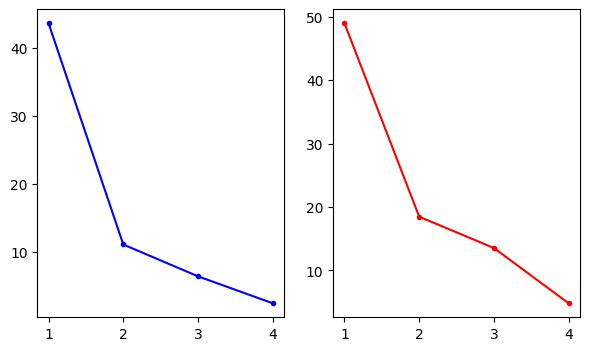

In [85]:
fig, ax = plt.subplots(1, 2, figsize=(7, 4))

ax[0].plot(np.arange(1, eigen_val_1.shape[0] + 1, 1), eigen_val_1, color ='blue', marker=".")
ax[1].plot(np.arange(1, eigen_val_2.shape[0] + 1, 1), eigen_val_2, color ='red', marker=".")

plt.show()

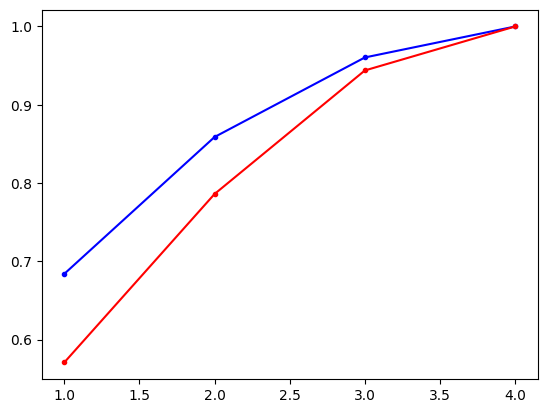

In [87]:
fig, ax = plt.subplots()

ax.plot(np.arange(1, eigen_val_1.shape[0] + 1, 1), disp_retained_1, color ='blue', marker=".")
ax.plot(np.arange(1, eigen_val_1.shape[0] + 1, 1), disp_retained_2, color ='red', marker=".")

plt.show()